In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import project_tests as t
import pickle

%matplotlib inline

df = pd.read_csv('data/user-item-interactions.csv')
df_content = pd.read_csv('data/articles_community.csv')
del df['Unnamed: 0']
del df_content['Unnamed: 0']

# Show df to get an idea of the data
df.head()

,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338.0,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276.0,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [2]:
# Show df_content to get an idea of the data
df_content.head()

,doc_body,doc_description,doc_full_name,doc_status,article_id
0,Skip navigation Sign in SearchLoading...\r\n\r...,Detect bad readings in real time using Python ...,Detect Malfunctioning IoT Sensors with Streami...,Live,0
1,No Free Hunch Navigation * kaggle.com\r\n\r\n ...,"See the forest, see the trees. Here lies the c...",Communicating data science: A guide to present...,Live,1
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Pat...,Here’s this week’s news in Data Science and Bi...,"This Week in Data Science (April 18, 2017)",Live,2
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCA...",Learn how distributed DBs solve the problem of...,DataLayer Conference: Boost the performance of...,Live,3
4,Skip navigation Sign in SearchLoading...\r\n\r...,This video demonstrates the power of IBM DataS...,Analyze NY Restaurant data using Spark in DSX,Live,4


### <a class="anchor" id="Exploratory-Data-Analysis">Part I : Exploratory Data Analysis</a>

Use the dictionary and cells below to provide some insight into the descriptive statistics of the data.

`1.` What is the distribution of how many articles a user interacts with in the dataset?  Provide a visual and descriptive statistics to assist with giving a look at the number of times each user interacts with an article.  

In [3]:
# Group by user and count interactions
user_interactions = df.groupby('email')['article_id'].count().reset_index()
user_interactions.columns = ['email', 'interaction_count']

In [4]:
# Descriptive statistics
descriptive_stats = user_interactions['interaction_count'].describe()
print(descriptive_stats)

count    5148.000000
mean        8.930847
std        16.802267
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       364.000000
Name: interaction_count, dtype: float64


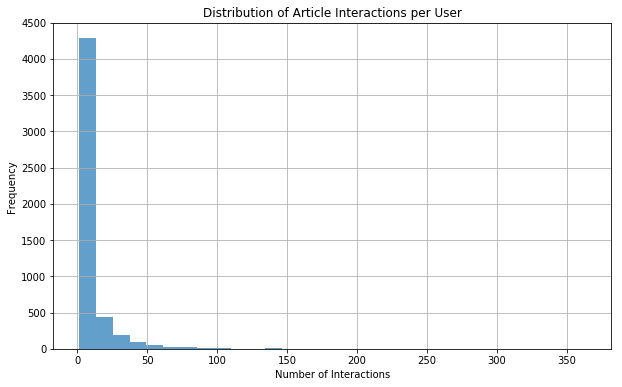

In [5]:
# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(user_interactions['interaction_count'], bins=30, alpha=0.7)
plt.title('Distribution of Article Interactions per User')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [6]:
# Fill in the median and maximum number of user_article interactios below

median_val = 3 # 50% of individuals interact with ____ number of articles or fewer.
max_views_by_user = 364 # The maximum number of user-article interactions by any 1 user is ______.

`2.` Explore and remove duplicate articles from the **df_content** dataframe.  

In [7]:
# Find duplicate articles
duplicates = df_content.article_id.duplicated()
duplicate_count = duplicates.sum()
print(f"Number of duplicate articles: {duplicate_count}")

# Display duplicate articles
duplicate_articles = df_content[duplicates]
print(duplicate_articles)

Number of duplicate articles: 5
                                              doc_body  \
365  Follow Sign in / Sign up Home About Insight Da...   
692  Homepage Follow Sign in / Sign up Homepage * H...   
761  Homepage Follow Sign in Get started Homepage *...   
970  This video shows you how to construct queries ...   
971  Homepage Follow Sign in Get started * Home\r\n...   

                                       doc_description  \
365  During the seven-week Insight Data Engineering...   
692  One of the earliest documented catalogs was co...   
761  Today’s world of data science leverages data f...   
970  This video shows you how to construct queries ...   
971  If you are like most data scientists, you are ...   

                                         doc_full_name doc_status  article_id  
365                       Graph-based machine learning       Live          50  
692  How smart catalogs can turn the big data flood...       Live         221  
761  Using Apache Spark as a p

In [8]:
# Remove any rows that have the same article_id - only keep the first
df_content.drop_duplicates(subset='article_id', keep='first', inplace=True) 

`3.` Use the cells below to find:

**a.** The number of unique articles that have an interaction with a user.  
**b.** The number of unique articles in the dataset (whether they have any interactions or not).<br>
**c.** The number of unique users in the dataset. (excluding null values) <br>
**d.** The number of user-article interactions in the dataset.

In [9]:
#  The number of unique articles that have an interaction with a user.
print("Number of unique articles with interactions:", df['article_id'].nunique())

Number of unique articles with interactions: 714


In [10]:
#  The number of unique articles in the dataset (whether they have any interactions or not).
print("Number of unique articles regardelss of interactions:", df_content['article_id'].nunique())

Number of unique articles regardelss of interactions: 1051


In [11]:
# The number of unique users in the dataset. (excluding null values)
unique_users = df['email'].nunique(dropna=True)
print("Number of unique users:", unique_users)

Number of unique users: 5148


In [12]:
# The number of user-article interactions in the dataset.
total_interactions = len(df)
print(f'Total number of user-article interactions: {total_interactions}')

Total number of user-article interactions: 45993


In [13]:
unique_articles = 714 # The number of unique articles that have at least one interaction
total_articles = 1051 # The number of unique articles on the IBM platform
unique_users = 5148 # The number of unique users
user_article_interactions = 45993 # The number of user-article interactions

`4.` Use the cells below to find the most viewed **article_id**, as well as how often it was viewed.  After talking to the company leaders, the `email_mapper` function was deemed a reasonable way to map users to ids.  There were a small number of null values, and it was found that all of these null values likely belonged to a single user (which is how they are stored using the function below).

In [14]:
article_views = df.groupby(['article_id']).count().sort_values(by='title', ascending=False).title.head(1)

print("Article ID and Number of article views:", article_views)

Article ID and Number of article views: article_id
1429.0    937
Name: title, dtype: int64


In [15]:
most_viewed_article_id = "1429.0" # The most viewed article in the dataset as a string with one value following the decimal 
max_views = 937 # The most viewed article in the dataset was viewed how many times?

In [16]:
## No need to change the code here - this will be helpful for later parts of the notebook
# Run this cell to map the user email to a user_id column and remove the email column

def email_mapper():
    coded_dict = dict()
    cter = 1
    email_encoded = []
    
    for val in df['email']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        
        email_encoded.append(coded_dict[val])
    return email_encoded

email_encoded = email_mapper()
del df['email']
df['user_id'] = email_encoded

# show header
df.head()

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5


In [17]:
## If you stored all your results in the variable names above, 
## you shouldn't need to change anything in this cell

sol_1_dict = {
    '`50% of individuals have _____ or fewer interactions.`': median_val,
    '`The total number of user-article interactions in the dataset is ______.`': user_article_interactions,
    '`The maximum number of user-article interactions by any 1 user is ______.`': max_views_by_user,
    '`The most viewed article in the dataset was viewed _____ times.`': max_views,
    '`The article_id of the most viewed article is ______.`': most_viewed_article_id,
    '`The number of unique articles that have at least 1 rating ______.`': unique_articles,
    '`The number of unique users in the dataset is ______`': unique_users,
    '`The number of unique articles on the IBM platform`': total_articles
}

# Test your dictionary against the solution
t.sol_1_test(sol_1_dict)

It looks like you have everything right here! Nice job!


### <a class="anchor" id="Rank">Part II: Rank-Based Recommendations</a>

Unlike in the earlier lessons, we don't actually have ratings for whether a user liked an article or not.  We only know that a user has interacted with an article.  In these cases, the popularity of an article can really only be based on how often an article was interacted with.

`1.` Fill in the function below to return the **n** top articles ordered with most interactions as the top. Test your function using the tests below.

In [18]:
def get_top_articles(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    # Get top article_ids as a list
    top_articles_df = df.groupby('article_id').count().title.sort_values(ascending=False).head(n).reset_index().article_id.astype(int).tolist()
  
    # Filter titles
    top_articles = df[df['article_id'].isin(top_articles_df)].title.drop_duplicates()
    
    
    return top_articles # Return the top article titles from df (not df_content)

def get_top_article_ids(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    top_articles = df.groupby('article_id').count().title.sort_values(ascending=False).head(n).reset_index().article_id.astype(int).tolist()
 
    return top_articles # Return the top article ids

In [19]:
print(get_top_articles(10))
print(get_top_article_ids(10))

1           healthcare python streaming application demo
2             use deep learning for image classification
14              apache spark lab, part 1: basic concepts
29     predicting churn with the spss random tree alg...
31               analyze energy consumption in buildings
37                        visualize car data with brunel
42     use xgboost, scikit-learn & ibm watson machine...
56     gosales transactions for logistic regression m...
66           insights from new york car accident reports
154    finding optimal locations of new store using d...
Name: title, dtype: object
[1429, 1330, 1431, 1427, 1364, 1314, 1293, 1170, 1162, 1304]


In [20]:
# Test your function by returning the top 5, 10, and 20 articles
top_5 = get_top_articles(5)
top_10 = get_top_articles(10)
top_20 = get_top_articles(20)

# Test each of your three lists from above
t.sol_2_test(get_top_articles)

Your top_5 looks like the solution list! Nice job.
Your top_10 looks like the solution list! Nice job.
Your top_20 looks like the solution list! Nice job.


### <a class="anchor" id="User-User">Part III: User-User Based Collaborative Filtering</a>


`1.` Use the function below to reformat the **df** dataframe to be shaped with users as the rows and articles as the columns.  

* Each **user** should only appear in each **row** once.


* Each **article** should only show up in one **column**.  


* **If a user has interacted with an article, then place a 1 where the user-row meets for that article-column**.  It does not matter how many times a user has interacted with the article, all entries where a user has interacted with an article should be a 1.  


* **If a user has not interacted with an item, then place a zero where the user-row meets for that article-column**. 

Use the tests to make sure the basic structure of your matrix matches what is expected by the solution.

In [21]:
# Create the user-item matrix with 1's and 0's
def create_user_item_matrix(df):
    '''
    INPUT:
    df - pandas dataframe with article_id, title, user_id columns
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with user ids as rows and article ids on the columns with 1 values where a user interacted with 
    an article and a 0 otherwise
    '''
    # Create the user-item matrix
    user_item = pd.pivot_table(df, values='title', index='user_id', 
                                       columns='article_id', aggfunc="count", fill_value=0)

    # Convert the interaction to binary values: 0 or 1 in case of duplicates
    user_item[user_item > 0] = 1

    return user_item  # return the user_item matrix 

In [22]:
# Create the matrix to test
user_item = create_user_item_matrix(df)

In [23]:
## Tests: You should just need to run this cell.  Don't change the code.
assert user_item.shape[0] == 5149, "Oops!  The number of users in the user-article matrix doesn't look right."
assert user_item.shape[1] == 714, "Oops!  The number of articles in the user-article matrix doesn't look right."
assert user_item.sum(axis=1)[1] == 36, "Oops!  The number of articles seen by user 1 doesn't look right."
print("You have passed our quick tests!  Please proceed!")

You have passed our quick tests!  Please proceed!


`2.` Complete the function below which should take a user_id and provide an ordered list of the most similar users to that user (from most similar to least similar).  The returned result should not contain the provided user_id, as we know that each user is similar to him/herself. Because the results for each user here are binary, it (perhaps) makes sense to compute similarity as the dot product of two users. 

Use the tests to test your function.

In [24]:
def find_similar_users(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user_id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    
    '''
    # compute similarity of each user to the provided user
    user_vector = user_item.loc[user_id]
    similarity_scores = user_item.dot(user_vector)

    # remove the own user's id
    similarity_scores[user_id] = np.nan

    # sort by similarity
    similar_users = similarity_scores.sort_values(ascending=False).head(10)

    # create list of just the ids
    most_similar_users=similar_users.index.tolist()
       
    return most_similar_users # return a list of the users in order from most to least similar

In [25]:
# Do a spot check of your function
print("The 10 most similar users to user 1 are: {}".format(find_similar_users(1)[:10]))
print("The 5 most similar users to user 3933 are: {}".format(find_similar_users(3933)[:5]))
print("The 3 most similar users to user 46 are: {}".format(find_similar_users(46)[:3]))

The 10 most similar users to user 1 are: [3933, 23, 3782, 203, 4459, 3870, 131, 4201, 46, 3697]
The 5 most similar users to user 3933 are: [1, 3782, 23, 203, 4459]
The 3 most similar users to user 46 are: [4201, 3782, 23]


`3.` Now that you have a function that provides the most similar users to each user, you will want to use these users to find articles you can recommend.  Complete the functions below to return the articles you would recommend to each user. 

In [26]:
#def get_article_names(article_ids):
def get_article_names(article_ids, df=df):
    '''
    INPUT:
    article_ids - (list) a list of article ids
    df - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the title column)
    '''
    article_names = df[df['article_id'].isin(article_ids)]['title'].tolist()
    
    return article_names  # Return the article names associated with list of article ids


def get_user_articles(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    article_ids - (list) a list of the article ids seen by the user
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the doc_full_name column in df_content)
    
    Description:
    Provides a list of the article_ids and article titles that have been seen by a user
    '''
    # Get the articles user has seen
    seen_articles = user_item.loc[user_id]
    article_ids = seen_articles[seen_articles == 1].index.tolist()
    
    # Get article names using the previously defined function
    article_names = get_article_names(article_ids, df)
    
    # Convert article ID to string and store in list
    article_ids = list(map(str, article_ids))
    
    return article_ids, article_names # return the ids and names


def user_user_recs(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds art/icles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    Users who are the same closeness are chosen arbitrarily as the 'next' user
    
    For the user where the number of recommended articles starts below m 
    and ends exceeding m, the last items are chosen arbitrarily
    
    '''
    # Get similar users
    similar_users = find_similar_users(user_id, user_item)
    
    # Get articles seen by the current user
    seen_article_ids, _ = get_user_articles(user_id, user_item, df)
    seen_set = set(seen_article_ids)  # For efficient look-up
    
    recs = []
    
    # Loop through similar users and get their article recommendations
    for sim_user in similar_users:
        # Get the articles that the similar user has seen
        sim_user_article_ids, _ = get_user_articles(sim_user, user_item, df)
        
        # Filter out articles already seen by the current user
        for article_id in sim_user_article_ids:
            if article_id not in seen_set and article_id not in recs:
                recs.append(article_id)
            # Stop if we have enough recommendations
            if len(recs) >= m:
                break
        if len(recs) >= m:
            break

 #   return recs[:m]  # Return recommendations, ensuring we only return m items
    
    return recs # return your recommendations for this user_id    

In [27]:
# Test your functions here - No need to change this code - just run this cell
assert set(get_article_names(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_article_names(['1320.0', '232.0', '844.0'])) == set(['housing (2015): united states demographic measures','self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_user_articles(20)[0]) == set(['1320.0', '232.0', '844.0'])
assert set(get_user_articles(20)[1]) == set(['housing (2015): united states demographic measures', 'self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook'])
assert set(get_user_articles(2)[0]) == set(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])
assert set(get_user_articles(2)[1]) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis'])
print("If this is all you see, you passed all of our tests!  Nice job!")

If this is all you see, you passed all of our tests!  Nice job!


`4.` Now we are going to improve the consistency of the **user_user_recs** function from above.  

* Instead of arbitrarily choosing when we obtain users who are all the same closeness to a given user - choose the users that have the most total article interactions before choosing those with fewer article interactions.


* Instead of arbitrarily choosing articles from the user where the number of recommended articles starts below m and ends exceeding m, choose articles with the articles with the most total interactions before choosing those with fewer total interactions. This ranking should be  what would be obtained from the **top_articles** function you wrote earlier.

In [28]:
def get_top_sorted_users(user_id, df=df, user_item=user_item):
    '''
    INPUT:
    user_id - (int)
    df - (pandas dataframe) df as defined at the top of the notebook 
    user_item - (pandas dataframe) matrix of users by articles: 
            1's when a user has interacted with an article, 0 otherwise
    
            
    OUTPUT:
    neighbors_df - (pandas dataframe) a dataframe with:
                    neighbor_id - is a neighbor user_id
                    similarity - measure of the similarity of each user to the provided user_id
                    num_interactions - the number of articles viewed by the user - if a u
                    
    Other Details - sort the neighbors_df by the similarity and then by number of interactions where 
                    highest of each is higher in the dataframe
     
    '''
   # Get the list of similar users using the find_similar_users function
    similar_users = find_similar_users(user_id, user_item)
    
    # Create a list to store data for the DataFrame
    neighbors_data = []

    for neighbor in similar_users:
        # Similarity score between the user and the neighbor
            similarity_score = user_item.loc[user_id].dot(user_item.loc[neighbor])
        
        # Number of interactions for the neighbor
            num_interactions = user_item.loc[neighbor].sum()
        
        # Add the data to the list
            neighbors_data.append([neighbor, similarity_score, num_interactions])
    
    # Create a DataFrame
    neighbors_df = pd.DataFrame(neighbors_data, columns=['neighbor_id', 'similarity', 'num_interactions'])
    
    # Sort by similarity (desc) and then by number of interactions (desc)
    neighbors_df = neighbors_df.sort_values(by=['similarity', 'num_interactions'], ascending=[False, False])

    
    return neighbors_df # Return the dataframe

In [29]:
def user_user_recs_part2(user_id, m):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user by article id
    rec_names - (list) a list of recommendations for the user by article title
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    * Choose the users that have the most total article interactions 
    before choosing those with fewer article interactions.

    * Choose articles with the articles with the most total interactions 
    before choosing those with fewer total interactions. 
   
    '''
    # Get the top sorted neighbors using the get_top_sorted_users function
    neighbors_df = get_top_sorted_users(user_id, df, user_item)
 
    # this is getting articles user has already read  
    user_read = set(user_item.loc[user_id][user_item.loc[user_id] == 1].index)
    
    # lists for recommendations
    recs = []
    rec_names = []
    neighbor_articles = []

    for identity in neighbors_df.neighbor_id.tolist():
        app = user_item.loc[identity][user_item.loc[identity] == 1].index.tolist()
        neighbor_articles.append(app)
    
    # Flatten the list of lists into a single list
    flattened_articles = [article for sublist in neighbor_articles for article in sublist]

    # Create a DataFrame from the flattened list
    articles_df = pd.DataFrame(flattened_articles, columns=['article_id'])
        
    # Grouping articles by interaction count
    article_interactions = pd.DataFrame(df.groupby('article_id').count()['user_id'])        

    articles_join = articles_df.join(article_interactions, how='left', on='article_id')
    #articles_join = articles_df.join(article_interactions.set_index('article_id'), on='article_id', how='left')

    # Sort the DataFrame by 'user_id' in descending order
    sorted_articles = articles_join.sort_values(by='user_id', ascending=False)
    sorted_articles.drop_duplicates(inplace=True)
    sorted_articles = sorted_articles[~sorted_articles['article_id'].isin(user_read)]

    
    # Display the sorted articles
    recs=sorted_articles.article_id.head(m).tolist()

    # Get rec names
    for article in recs:
        title = pd.DataFrame(df[df['article_id']==article].title)
        title.drop_duplicates(inplace=True)
        rec_names.append(title.title.tolist()[0])
    
    return recs, rec_names

In [30]:
# Quick spot check - don't change this code - just use it to test your functions
rec_ids, rec_names = user_user_recs_part2(20, 10)
print("The top 10 recommendations for user 20 are the following article ids:")
print(rec_ids)
print()
print("The top 10 recommendations for user 20 are the following article names:")
print(rec_names)

The top 10 recommendations for user 20 are the following article ids:
[1429.0, 1330.0, 1431.0, 1427.0, 1364.0, 1314.0, 1293.0, 1162.0, 1304.0, 1436.0]

The top 10 recommendations for user 20 are the following article names:
['use deep learning for image classification', 'insights from new york car accident reports', 'visualize car data with brunel', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'predicting churn with the spss random tree algorithm', 'healthcare python streaming application demo', 'finding optimal locations of new store using decision optimization', 'analyze energy consumption in buildings', 'gosales transactions for logistic regression model', 'welcome to pixiedust']


`5.` Use your functions from above to correctly fill in the solutions to the dictionary below.  Then test your dictionary against the solution.  Provide the code you need to answer each following the comments below.

In [31]:
user1_most_sim = int(get_top_sorted_users(1).head(1)['neighbor_id'].tolist()[0])
user131_10th_sim = int(get_top_sorted_users(131).head(10).tail(1)['neighbor_id'].tolist()[0])

print(user1_most_sim, user131_10th_sim)


3933 242


In [32]:
## Dictionary Test Here
sol_5_dict = {
    'The user that is most similar to user 1.': user1_most_sim, 
    'The user that is the 10th most similar to user 131': user131_10th_sim,
}

t.sol_5_test(sol_5_dict)

This all looks good!  Nice job!


`6.` If we were given a new user, which of the above functions would you be able to use to make recommendations?  Explain.  Can you think of a better way we might make recommendations?  Use the cell below to explain a better method for new users.

**Provide your response here.**
As we do not have any previous interactions for new users to base our recommendations on, the best way to suggest articles for them would be to use our get_top_articles function, which looks at the most interacted with articles and suggests those, until we have enough data to make more informed recommendations using our user_user_recs_part2 functiom/

`7.` Using your existing functions, provide the top 10 recommended articles you would provide for the a new user below.  You can test your function against our thoughts to make sure we are all on the same page with how we might make a recommendation.

In [33]:
new_user = '0.0'
#We have no viewing history so I would just recommend the top 10 articles.
# What would your recommendations be for this new user '0.0'?  As a new user, they have no observed articles.
# Provide a list of the top 10 article ids you would give to 

new_user_recs = list(map(str, map(float, get_top_article_ids(10))))

In [34]:
assert set(new_user_recs) == set(['1314.0','1429.0','1293.0','1427.0','1162.0','1364.0','1304.0','1170.0','1431.0','1330.0']), "Oops!  It makes sense that in this case we would want to recommend the most popular articles, because we don't know anything about these users."

print("That's right!  Nice job!")

That's right!  Nice job!


### <a class="anchor" id="Matrix-Fact">Part V: Matrix Factorization</a>

In this part of the notebook, you will build use matrix factorization to make article recommendations to the users on the IBM Watson Studio platform.

`1.` You should have already created a **user_item** matrix above in **question 1** of **Part III** above.  This first question here will just require that you run the cells to get things set up for the rest of **Part V** of the notebook. 

In [35]:
# Load the matrix here
user_item_matrix = pd.read_pickle('user_item_matrix.p')

In [36]:
# quick look at the matrix
user_item_matrix.head()

article_id,0.0,100.0,1000.0,1004.0,1006.0,1008.0,101.0,1014.0,1015.0,1016.0,...,977.0,98.0,981.0,984.0,985.0,986.0,990.0,993.0,996.0,997.0
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


`2.` In this situation, you can use Singular Value Decomposition from [numpy](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html) on the user-item matrix.  Use the cell to perform SVD, and explain why this is different than in the lesson.

In [37]:
# Perform SVD on the User-Item Matrix Here
u, s, vt = np.linalg.svd(user_item_matrix) # use the built in to get the three matrices

**Provide your response here.**
In the lesson we were dealing with some missing or null values, whereas here we are not.

`3.` Now for the tricky part, how do we choose the number of latent features to use?  Running the below cell, you can see that as the number of latent features increases, we obtain a lower error rate on making predictions for the 1 and 0 values in the user-item matrix.  Run the cell below to get an idea of how the accuracy improves as we increase the number of latent features.

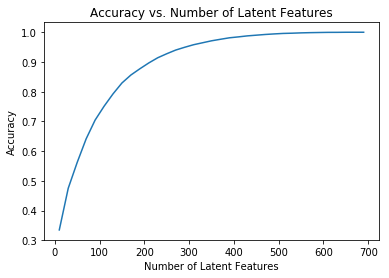

In [38]:
num_latent_feats = np.arange(10,700+10,20)
sum_errs = []

for k in num_latent_feats:
    # restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
    # take dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # compute error for each prediction to actual value
    diffs = np.subtract(user_item_matrix, user_item_est)
    
    # total errors and keep track of them
    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err)
    
    
plt.plot(num_latent_feats, 1 - np.array(sum_errs)/df.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');

`4.` From the above, we can't really be sure how many features to use, because simply having a better way to predict the 1's and 0's of the matrix doesn't exactly give us an indication of if we are able to make good recommendations.  Instead, we might split our dataset into a training and test set of data, as shown in the cell below.  

Use the code from question 3 to understand the impact on accuracy of the training and test sets of data with different numbers of latent features. Using the split below: 

* How many users can we make predictions for in the test set?  
* How many users are we not able to make predictions for because of the cold start problem?
* How many articles can we make predictions for in the test set?  
* How many articles are we not able to make predictions for because of the cold start problem?

In [39]:
#### Changing to solve shape error

df_train = df.head(40000)
df_test = df.tail(5993)

def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
                      (unique users for each row and unique articles for each column)
    user_item_test - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique articles for each column)
    test_idx - all of the test user ids
    test_arts - all of the test article ids
    '''

    # training matrix
    user_item_train = create_user_item_matrix(df_train)
    
    # test matrix
    user_item_test = create_user_item_matrix(df_test)
    
    # users
    train_idx = set(user_item_train.index)
    test_idx = set(user_item_test.index)
    match_idx = list(train_idx.intersection(test_idx))
    
    # articles
    train_arts = set(user_item_train.columns)
    test_arts =  set(user_item_test.columns)
    match_cols = list(train_arts.intersection(test_arts))
    user_item_test = user_item_test.loc[match_idx, match_cols]

         
    
    return user_item_train, user_item_test, test_idx, test_arts

user_item_train, user_item_test, test_idx, test_arts = create_test_and_train_user_item(df_train, df_test)

In [40]:
# Replace the values in the dictionary below
a = 662 
b = 574 
c = 20 
d = 0 


sol_4_dict = {
    'How many users can we make predictions for in the test set?':c, 
    'How many users in the test set are we not able to make predictions for because of the cold start problem?':a, 
    'How many articles can we make predictions for in the test set?':b,
    'How many articles in the test set are we not able to make predictions for because of the cold start problem?':d
}

t.sol_4_test(sol_4_dict)

Awesome job!  That's right!  All of the test articles are in the training data, but there are only 20 test users that were also in the training set.  All of the other users that are in the test set we have no data on.  Therefore, we cannot make predictions for these users using SVD.


`5.` Now use the **user_item_train** dataset from above to find U, S, and V transpose using SVD. Then find the subset of rows in the **user_item_test** dataset that you can predict using this matrix decomposition with different numbers of latent features to see how many features makes sense to keep based on the accuracy on the test data. This will require combining what was done in questions `2` - `4`.

Use the cells below to explore how well SVD works towards making predictions for recommendations on the test data.  

In [41]:
# fit SVD on the user_item_train matrix
u_train, s_train, vt_train = np.linalg.svd(user_item_train) # fit svd similar to above then use the cells below

In [42]:
common_users_boolean_array = user_item_train.index.isin(test_idx)
common_arts_boolean_array = user_item_train.columns.isin(test_arts)
u_test, vt_test = u_train[common_users_boolean_array,:], vt_train[:, common_arts_boolean_array]
u_train[:, ], vt_train[:k, :]

(array([[ -4.62841801e-02,   7.24374386e-03,  -3.26784232e-02, ...,
           1.82629097e-03,   3.93376480e-03,  -6.13160468e-03],
        [ -1.13343174e-02,   1.67841706e-02,  -4.12142493e-03, ...,
           1.88597431e-03,  -7.06372272e-03,  -1.16070570e-02],
        [ -5.40077341e-02,  -1.38542393e-03,   1.86046883e-02, ...,
           2.06181059e-03,  -5.91956895e-03,  -2.24637682e-03],
        ..., 
        [ -7.71071680e-03,   1.59153611e-02,  -3.29314206e-03, ...,
           9.71401576e-01,   2.65322429e-03,  -3.27397400e-04],
        [ -2.71355929e-03,   5.58510613e-03,  -2.49269886e-03, ...,
          -3.92672271e-04,   8.28553659e-01,   4.90415936e-03],
        [ -1.61097454e-02,  -6.66008794e-03,   7.28103953e-03, ...,
          -2.81923634e-04,  -6.56114529e-04,   4.87816582e-01]]),
 array([[ -2.17234322e-03,  -2.50211538e-02,  -2.47568584e-03, ...,
          -5.79458602e-04,  -4.04943583e-03,  -4.67213654e-03],
        [  2.07052261e-03,  -2.21578691e-02,   1.47527709e-0

Text(0.5,1,'Accuracy vs. Number of Latent Features')

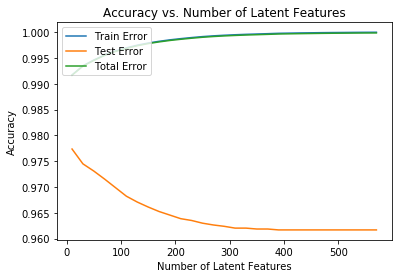

In [44]:
num_latent_feats = np.arange(10, 570 + 10, 20)
sum_train_errs = []
sum_test_errs = []
total_errors = []  # New list for total errors

for k in num_latent_feats:
    # restructure with k latent features    
    s_train_new, u_train_new, vt_train_new = np.diag(s_train[:k]), u_train[:, :k], vt_train[:k, :]
    s_test_new, u_test_new, vt_test_new = np.diag(s_train[:k]), u_test[:, :k], vt_test[:k, :]
    
    # take dot product
    user_item_train_est = np.around(np.dot(np.dot(u_train_new, s_train_new), vt_train_new))
    user_item_test_est = np.around(np.dot(np.dot(u_test_new, s_test_new), vt_test_new))
       
    # compute error for each prediction to actual value
    diffs_train = np.subtract(user_item_train, user_item_train_est)
    diffs_test = np.subtract(user_item_test, user_item_test_est)
    
    # total errors and keep track of them
    err_train = np.sum(np.sum(np.abs(diffs_train)))
    err_test = np.sum(np.sum(np.abs(diffs_test)))
    
    # Calculate total error and store it
    total_error = err_train + err_test  # Sum of train and test errors
    sum_train_errs.append(err_train)
    sum_test_errs.append(err_test)
    total_errors.append(total_error)  # Append total error

# Plotting
plt.plot(num_latent_feats, 1 - (np.array(sum_train_errs) / (user_item_train.shape[0] * user_item_train.shape[1])), label="Train Error")
plt.plot(num_latent_feats, 1 - np.array(sum_test_errs) / (user_item_test.shape[0] * user_item_test.shape[1]), label="Test Error")
plt.plot(num_latent_feats, 1 - np.array(total_errors) / (user_item_train.shape[0] * user_item_train.shape[1] + user_item_test.shape[0] * user_item_test.shape[1]), label="Total Error")

plt.legend(loc="upper left")
plt.xlabel('Number of Latent Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Latent Features')


`6.` Use the cell below to comment on the results you found in the previous question. Given the circumstances of your results, discuss what you might do to determine if the recommendations you make with any of the above recommendation systems are an improvement to how users currently find articles? 

**Your response here.**
The MSE score suggests that the model is making good predicitons, but there is room for improvement.

A good way to test whether the recommendation model is proving useful for customers is to implement an A/B test explored earlier in the course. You could use this to see if more customers read the articles selected especially for them over ones randomly suggested.

In [74]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Recommendations_with_IBM.ipynb'])

0